In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline   
###plots are displayed inline within the notebook, rather than in a separate window or output cell.


In [2]:
df = pd.read_csv(r"EasyVisa.csv")
# df.head()

In [3]:
df.shape

(25480, 12)

In [4]:
#Describe summary statistics for a dataframe

df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


In [5]:
#Check Null and Dtypes
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [6]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print("We have {} numerical features : {}".format(len(numeric_features),numeric_features))
print("We have {} categorical features : {}".format(len(categorical_features),categorical_features))

We have 3 numerical features : ['no_of_employees', 'yr_of_estab', 'prevailing_wage']
We have 9 categorical features : ['case_id', 'continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']


In [7]:
# proportion of count data on categorical columns

for col in categorical_features:
    print(df[col].value_counts(normalize=True) * 100)
    print('-----------------------------')

case_id
EZYV01       0.003925
EZYV16995    0.003925
EZYV16993    0.003925
EZYV16992    0.003925
EZYV16991    0.003925
               ...   
EZYV8492     0.003925
EZYV8491     0.003925
EZYV8490     0.003925
EZYV8489     0.003925
EZYV25480    0.003925
Name: proportion, Length: 25480, dtype: float64
-----------------------------
continent
Asia             66.173469
Europe           14.646782
North America    12.919937
South America     3.343799
Africa            2.162480
Oceania           0.753532
Name: proportion, dtype: float64
-----------------------------
education_of_employee
Bachelor's     40.164835
Master's       37.810047
High School    13.422292
Doctorate       8.602826
Name: proportion, dtype: float64
-----------------------------
has_job_experience
Y    58.092622
N    41.907378
Name: proportion, dtype: float64
-----------------------------
requires_job_training
N    88.402669
Y    11.597331
Name: proportion, dtype: float64
-----------------------------
region_of_employment
Nort

In [8]:
#Univariate analysis: It refers to the analysis of one variable. The purpose of univariate analysis is to understand the distribution of the values for a single variable.
#Bivariate Analysis: The analysis of two variables.
#Multivariate Analysis: The analysis of two or more variables. 

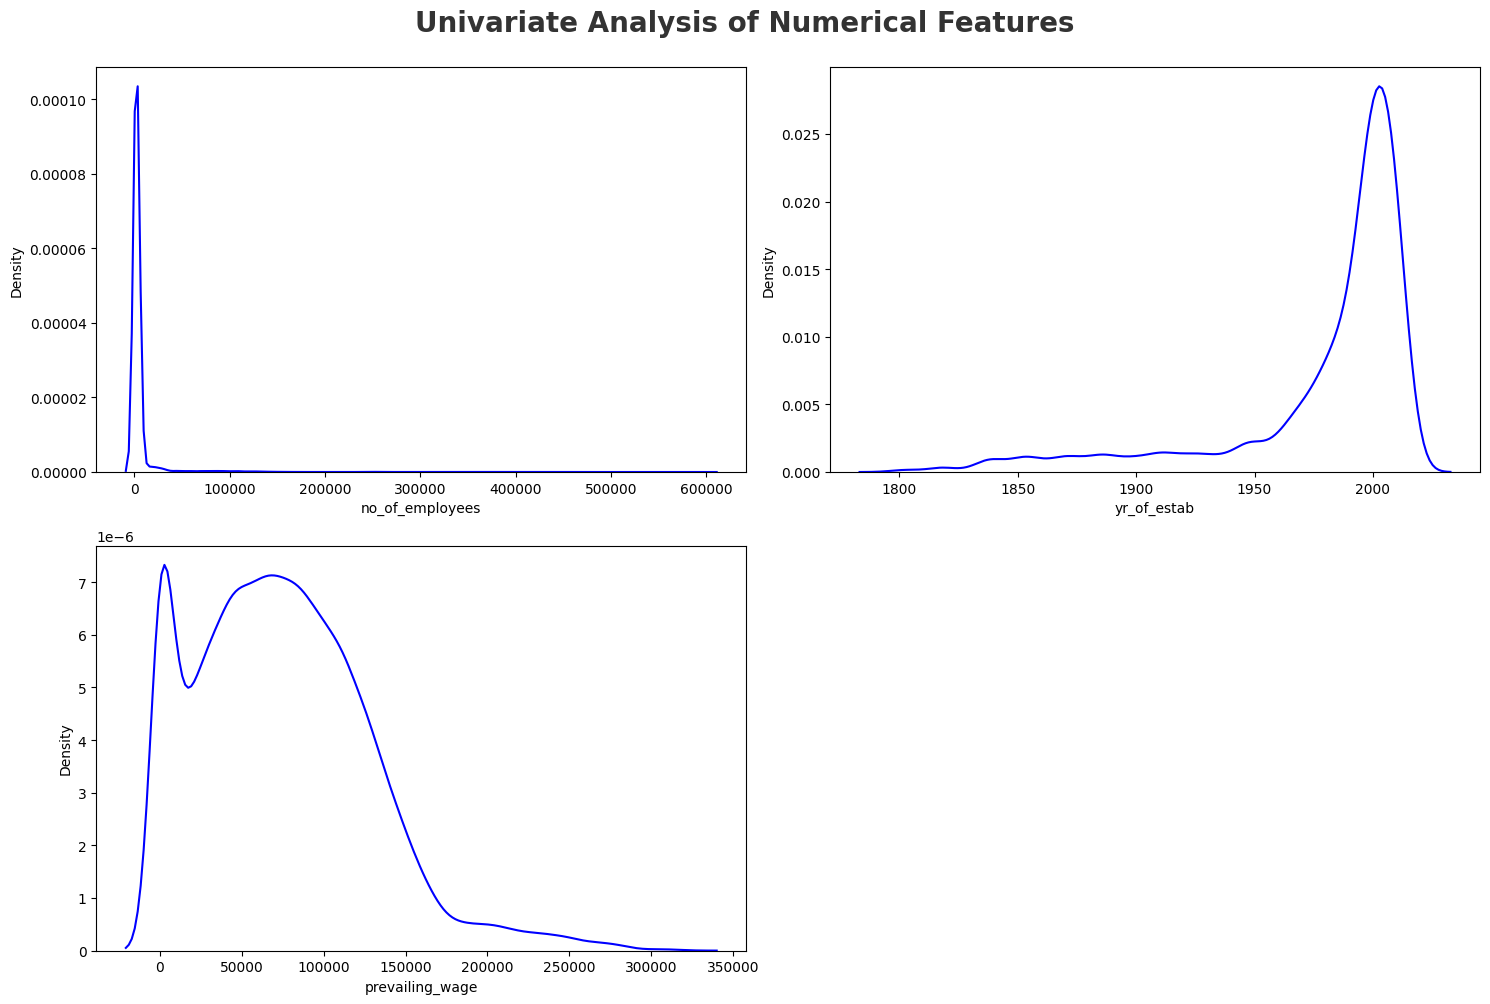

In [9]:
plt.figure(figsize=(15,10))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize = 20, fontweight='bold',alpha=0.8,y=1)

for i in range(0,len(numeric_features)):
    plt.subplot(2,2,i+1)
    sns.kdeplot(x=df[numeric_features[i]],color='blue')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()


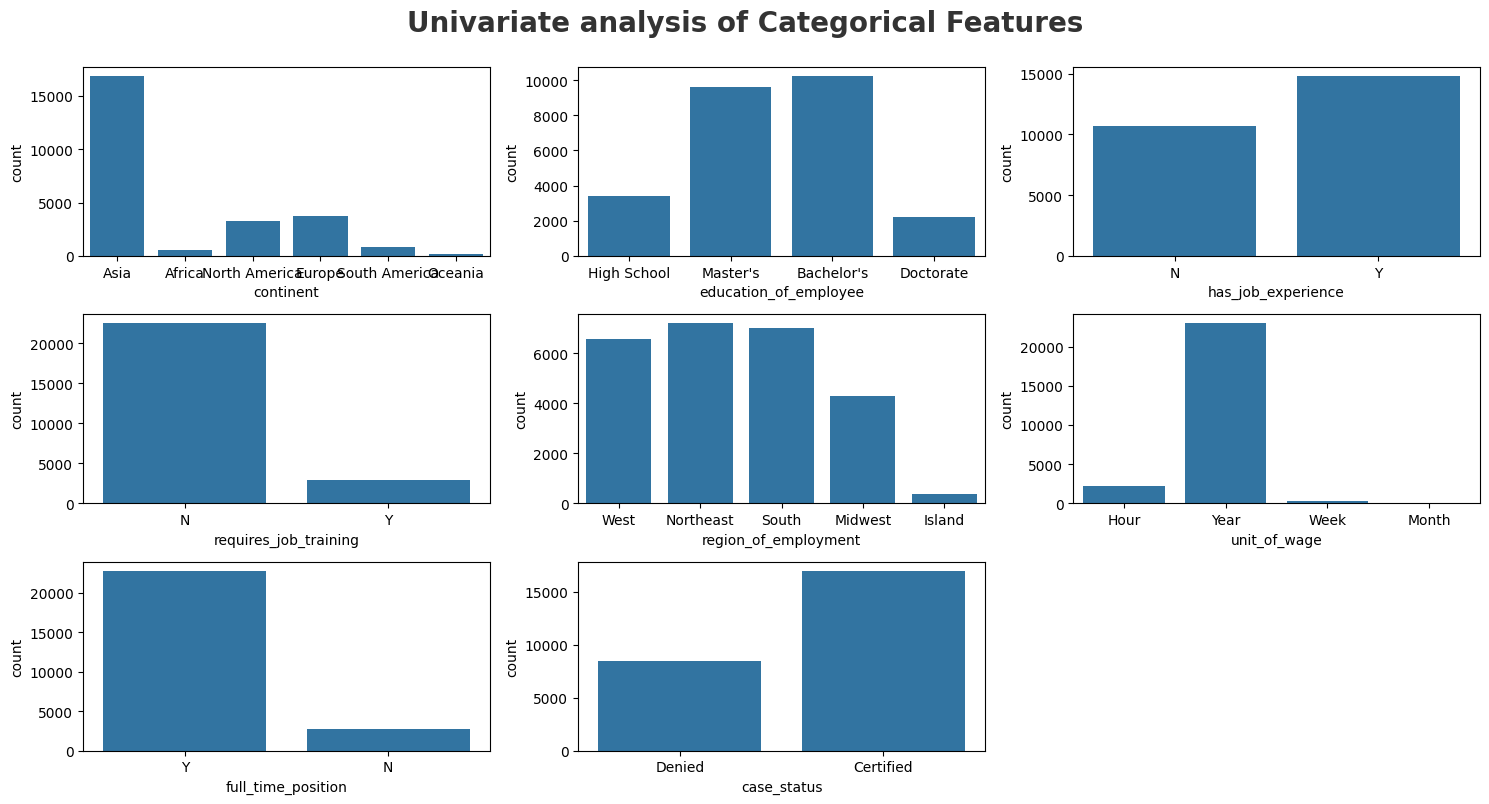

In [10]:
#Categorical Columns

categorical_features.remove('case_id')
plt.figure(figsize=(15,8))
plt.suptitle('Univariate analysis of Categorical Features', fontsize = 20,fontweight='bold',alpha=0.8, y=1.)

for i in range(0,len(categorical_features)):
    plt.subplot(3,3,i+1)
    sns.countplot(x=df[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    plt.tight_layout()






In [11]:
# Multivariate analysis is the analysis of more than one variable.

discrete_features = [features for features in numeric_features if len(df[features].unique()) <=25]

continous_features = [features for features in numeric_features if len(df[features].unique())> 25]

print('We have {} discrete features : {}'.format(len(discrete_features), discrete_features))
print('We have {} continous features : {}'.format(len(continous_features),continous_features))


#remove skewness use power transformation



We have 0 discrete features : []
We have 3 continous features : ['no_of_employees', 'yr_of_estab', 'prevailing_wage']


In [12]:
#Check multicollinearity in Numerical Features
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [13]:
#There is no mulitcollinearity between any variables as no column is dominating other columns in dataframe

In [14]:
# Check Multicollinearity for categorical features
#A Chi-squared test(also chi-square or X^2 test) is a statistical hypothesis test that is valid to perform when the test statistic is chi-squared distributed under null hypothesis,
#specifically Pearson's chi-squared test
# A chi-square is one way to show a relationship between 2 categorical variables.
#Here we test correlation of Categorical columns with Target columns i.e, case_status

#NULL Hypothesis(H0): The Feature is independent of target column (No-correlation)
#Alternative Hypothesis(H1): The Feature and Target column are not independent (Correlated)



In [15]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in categorical_features:
    if chi2_contingency(pd.crosstab(df['case_status'],df[feature]))[1] <0.05:
        # print(chi2_contingency(pd.crosstab(df['case_status'],df[feature]))[1])
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Failed to reject Null Hypothesis')
result = pd.DataFrame(data=[categorical_features,chi2_test]).T
result.columns = ['column', 'Hypothesis Result']
result
# print(df['case_status'])

,column,Hypothesis Result
0,continent,Reject Null Hypothesis
1,education_of_employee,Reject Null Hypothesis
2,has_job_experience,Reject Null Hypothesis
3,requires_job_training,Failed to reject Null Hypothesis
4,region_of_employment,Reject Null Hypothesis
5,unit_of_wage,Reject Null Hypothesis
6,full_time_position,Reject Null Hypothesis
7,case_status,Reject Null Hypothesis


In [16]:
# Here requires_job_training fails to reject Null Hypothesis which means it doesn't correlate with target column.

In [17]:
# Checking Null Values

df.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

In [18]:
continous_features = [feature for feature in numeric_features if len(df[feature].unique()) >=10]
print('Number of continous features :', continous_features)

Number of continous features : ['no_of_employees', 'yr_of_estab', 'prevailing_wage']


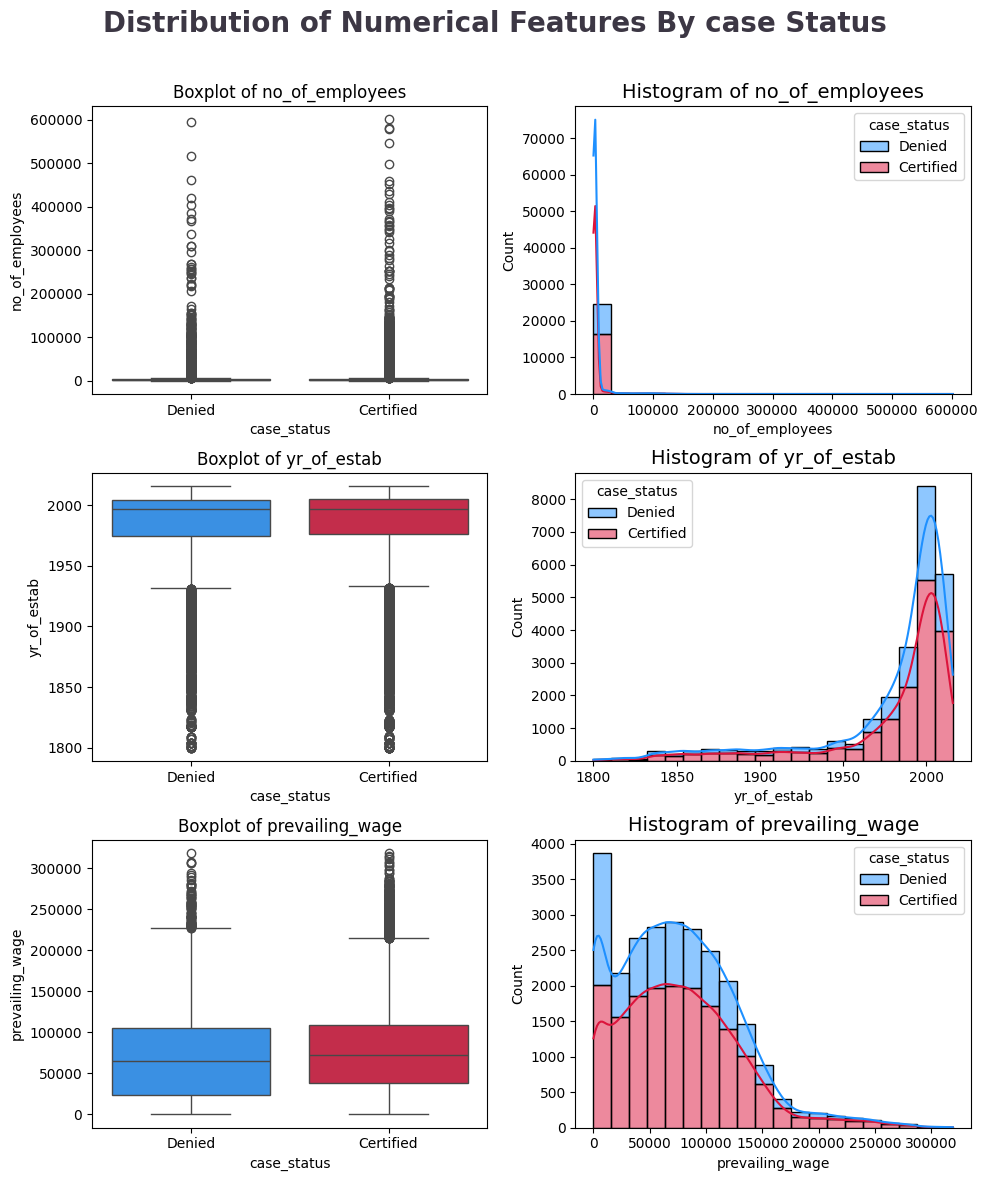

In [19]:
#plot distribution

clr1 = ['#1E90FF','#DC143C']
fig, ax = plt.subplots(3,2,figsize=(10,12))
fig.suptitle('Distribution of Numerical Features By case Status', color ='#3C3744',
             fontsize=20, fontweight='bold',ha='center')
for i,col in enumerate(continous_features):
    sns.boxplot(data=df,x='case_status',y=col,palette=clr1,ax=ax[i,0])
    ax[i,0].set_title(f'Boxplot of {col}',fontsize=12)
    sns.histplot(data=df,x=col,hue='case_status',bins=20,kde=True,
                 multiple='stack',palette=clr1,ax=ax[i,1])
    ax[i,1].set_title(f'Histogram of {col}',fontsize=14)
fig.tight_layout()
fig.subplots_adjust(top=0.90)

In [20]:
# No of employees has many outliers which can be handled in feature engineering and no_of_employees is right skewed.
# yr_of_estab is left skewed and some outliers are below the lower bound of box plot
# prevaling_wage is right skewed with outliers above the upper bound
# There are No missing values in dataset.
# The case_id columns can be deleted because each row has unique values.
# The case_status column is the target to predict. 
# In the categorical column, features can be made Binary numerical in feature Encoding. 


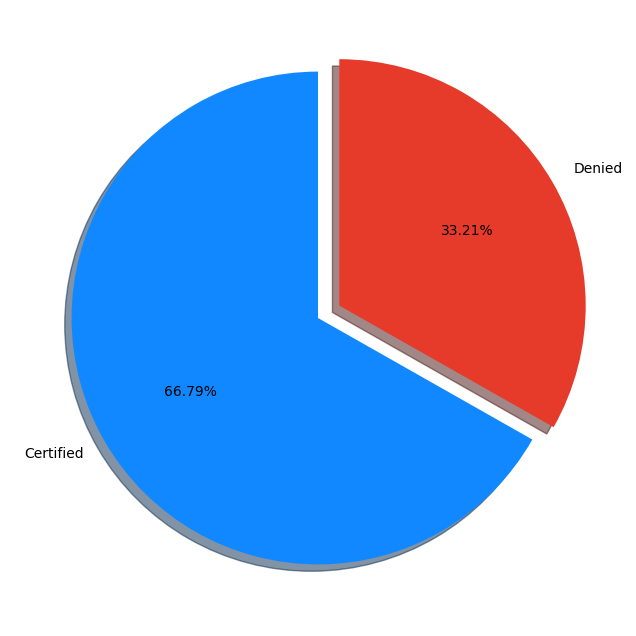

In [21]:
#visualize the Target Feature.
percentage = df.case_status.value_counts(normalize = True)*100
labels = ["Certified","Denied"]

#Plot PieChart with Ploty Library
fig,ax = plt.subplots(figsize = (15,8))
explode = (0,0.1)
colors = ['#1188ff','#e63a2a']
ax.pie(percentage,labels = labels, startangle = 90,
       autopct = '%1.2f%%',explode=explode,shadow=True,colors=colors)
plt.show()

In [22]:
# From  the chart we can see the Target variable is Imbalanced.
# Imbalanced data are types of data where the target class has an uneven distribution of observations, i.e, Here Denied value has more count than the certified value
# of the dataset

In [23]:
#Does applicant Continent has any impact on visa status?
#Group data by continent and their count of case_status

df.groupby('continent')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
continent     case_status            
Africa        Certified     72.050817
              Denied        27.949183
Asia          Certified     65.310480
              Denied        34.689520
Europe        Certified     79.233655
              Denied        20.766345
North America Certified     61.877278
              Denied        38.122722
Oceania       Certified     63.541667
              Denied        36.458333
South America Certified     57.863850
              Denied        42.136150

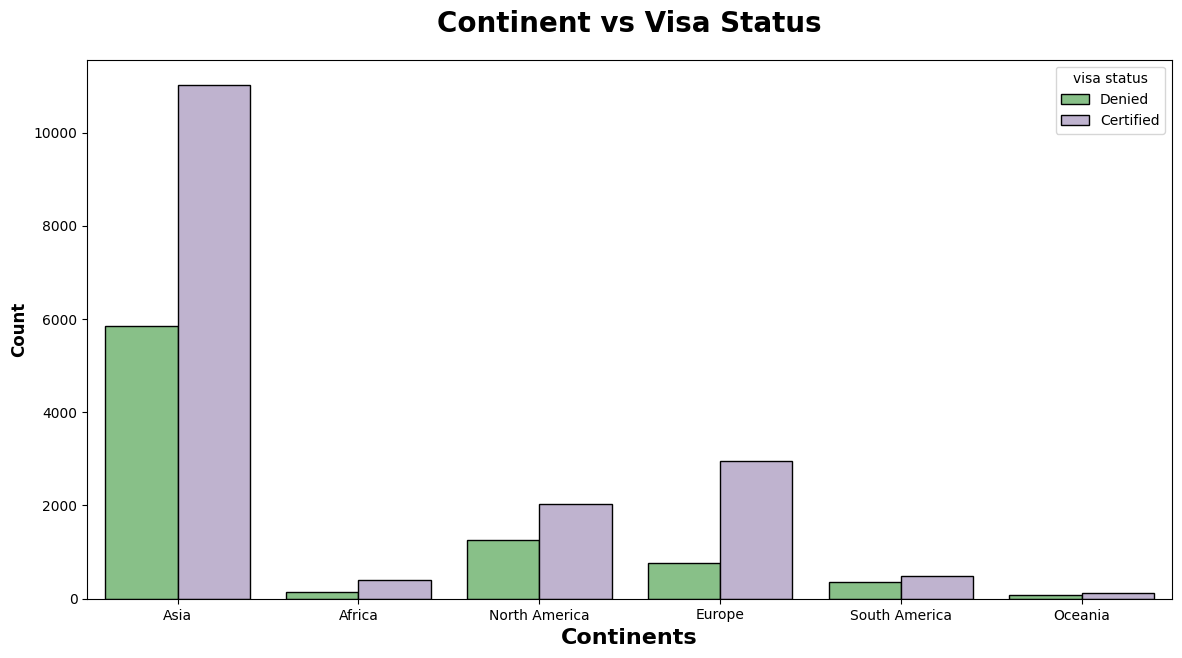

In [24]:
plt.subplots(figsize=(14,7))
sns.countplot(x='continent',hue='case_status',data=df,ec='black',palette='Accent')
plt.title("Continent vs Visa Status", weight="bold", fontsize=20, pad=20)
plt.ylabel("Count",weight="bold",fontsize=12)
plt.xlabel("Continents",weight="bold",fontsize=16)
plt.legend(title="visa status",fancybox=True)
plt.show()

In [25]:
df2 = df.copy()

continent
Asia             65.310480
Europe           79.233655
North America    61.877278
South America    57.863850
Africa           72.050817
Oceania          63.541667
Name: count, dtype: float64


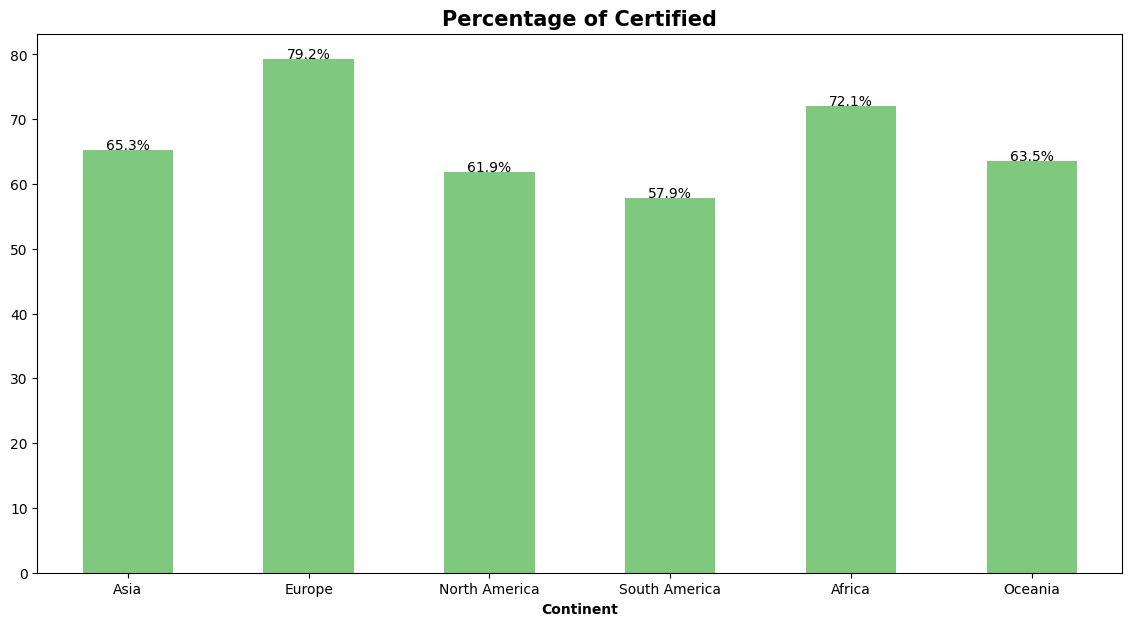

In [26]:
plt.figure(figsize=[14,7])

(100*df2[df2["case_status"].isin(['Certified'])]['continent'].value_counts()/df2['continent'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Certified" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['continent'].value_counts()/df2['continent'].value_counts())
print(order1)
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('Continent' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

In [27]:
# Does applicant education has any impact on visa status?
df.groupby('education_of_employee')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
education_of_employee case_status            
Bachelor's            Certified     62.214188
                      Denied        37.785812
Doctorate             Certified     87.226277
                      Denied        12.773723
High School           Denied        65.964912
                      Certified     34.035088
Master's              Certified     78.627777
                      Denied        21.372223

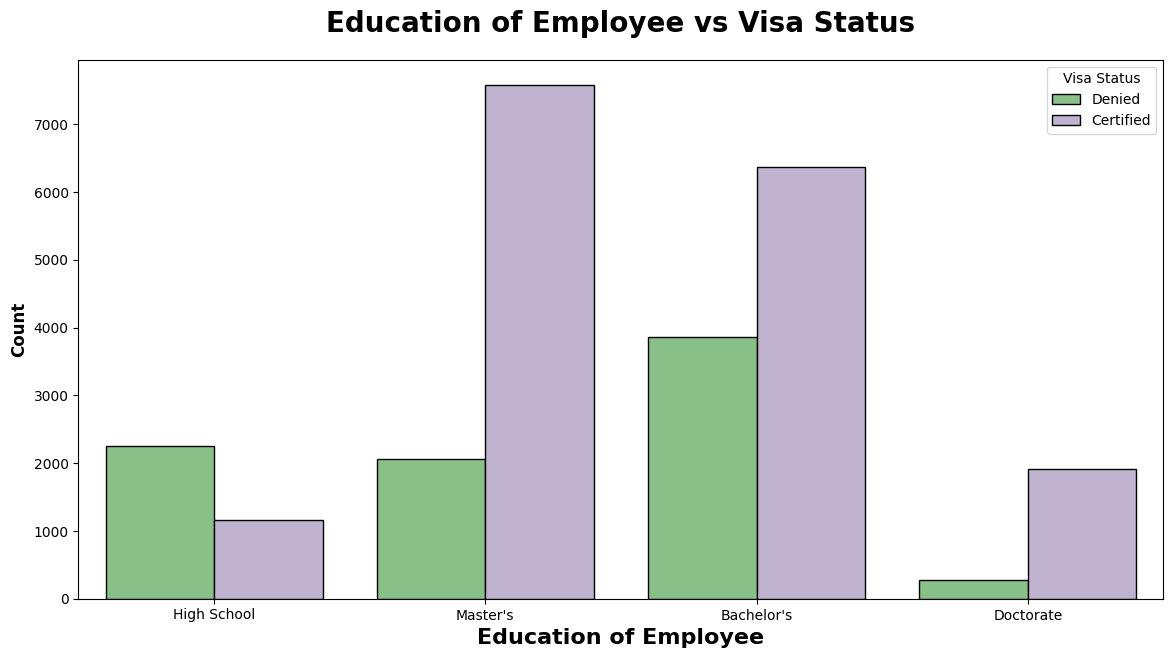

In [28]:
plt.subplots(figsize=(14,7))
sns.countplot(x="education_of_employee",hue="case_status",data=df,ec = "black", palette = "Accent")
plt.title("Education of Employee vs Visa Status",weight="bold",fontsize=20, pad=20)
plt.ylabel("Count",weight="bold",fontsize=12)
plt.xlabel("Education of Employee",weight="bold",fontsize = 16)
plt.legend(title="Visa Status", fancybox=True)
plt.show()


education_of_employee
Bachelor's     62.214188
Doctorate      87.226277
High School    34.035088
Master's       78.627777
Name: count, dtype: float64


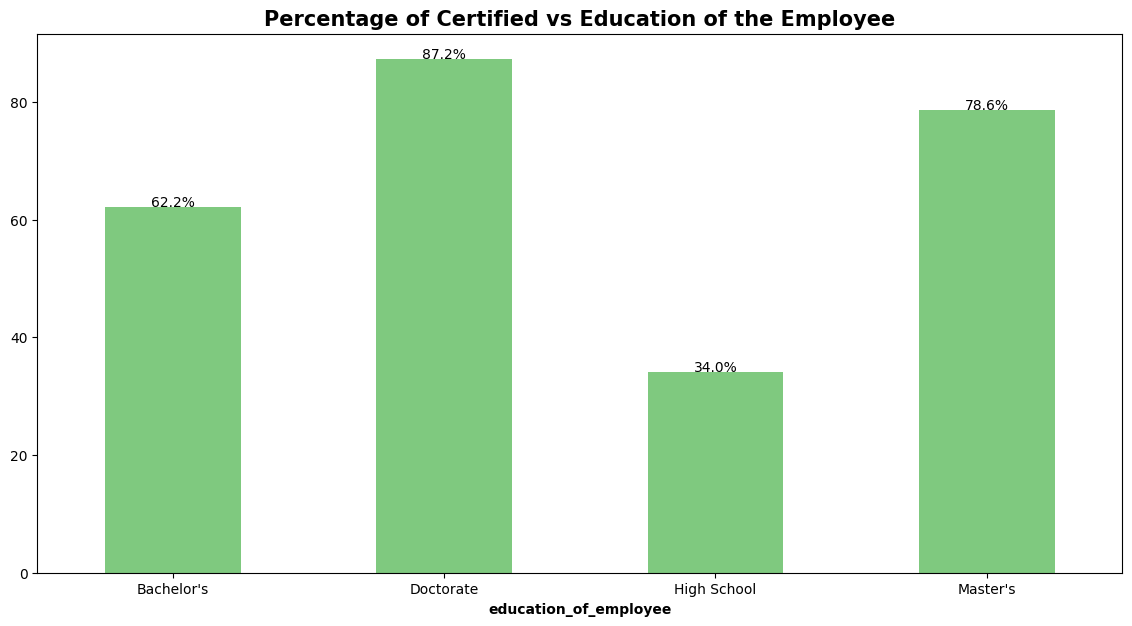

In [29]:
plt.figure(figsize=[14,7])

(100*df2[df2["case_status"].isin(['Certified'])]['education_of_employee'].value_counts()/df2['education_of_employee'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Certified vs Education of the Employee" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['education_of_employee'].value_counts()/df2['education_of_employee'].value_counts())
print(order1)
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('education_of_employee' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

In [30]:
# Does application previous work experience has any impact on visa status?

df.groupby('has_job_experience')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
has_job_experience case_status            
N                  Certified     56.134108
                   Denied        43.865892
Y                  Certified     74.476422
                   Denied        25.523578

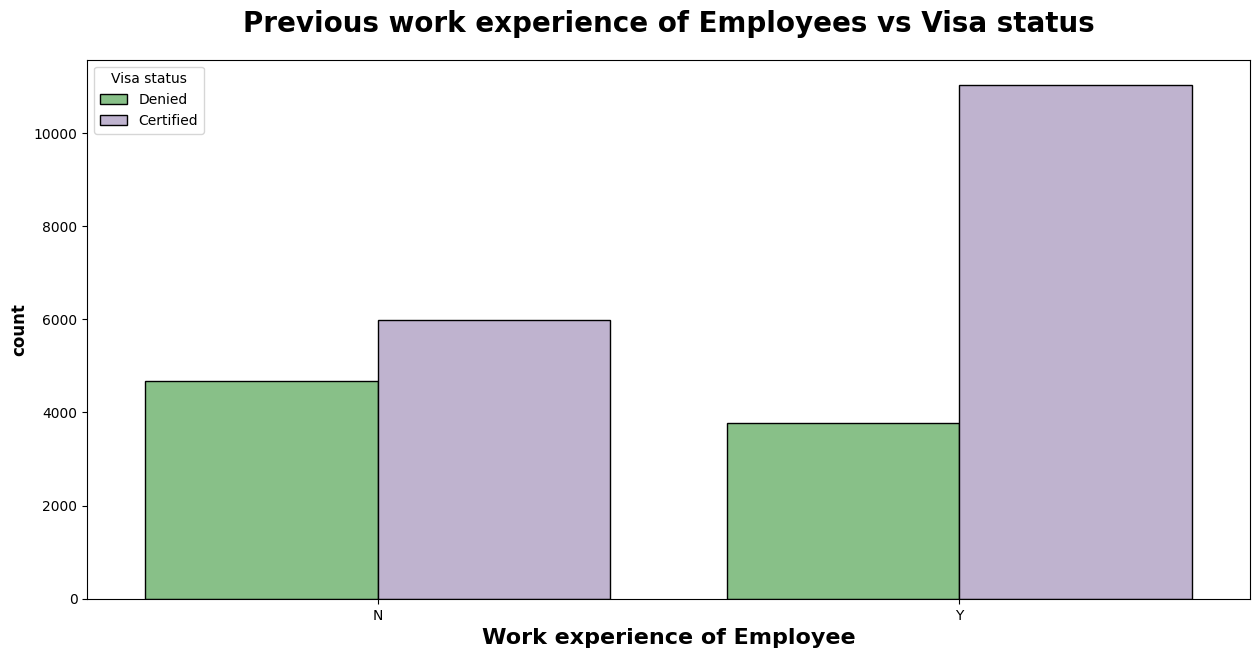

In [31]:
plt.subplots(figsize=(15,7))
sns.countplot(x="has_job_experience",hue="case_status",data=df,ec="black",palette="Accent")
plt.title("Previous work experience of Employees vs Visa status",weight="bold",fontsize=20,pad=20)
plt.ylabel("count",weight="bold",fontsize=12)
plt.xlabel("Work experience of Employee",weight="bold",fontsize=16)
plt.legend(title="Visa status", fancybox=True)
plt.show()

has_job_experience
Y    74.476422
N    56.134108
Name: count, dtype: float64


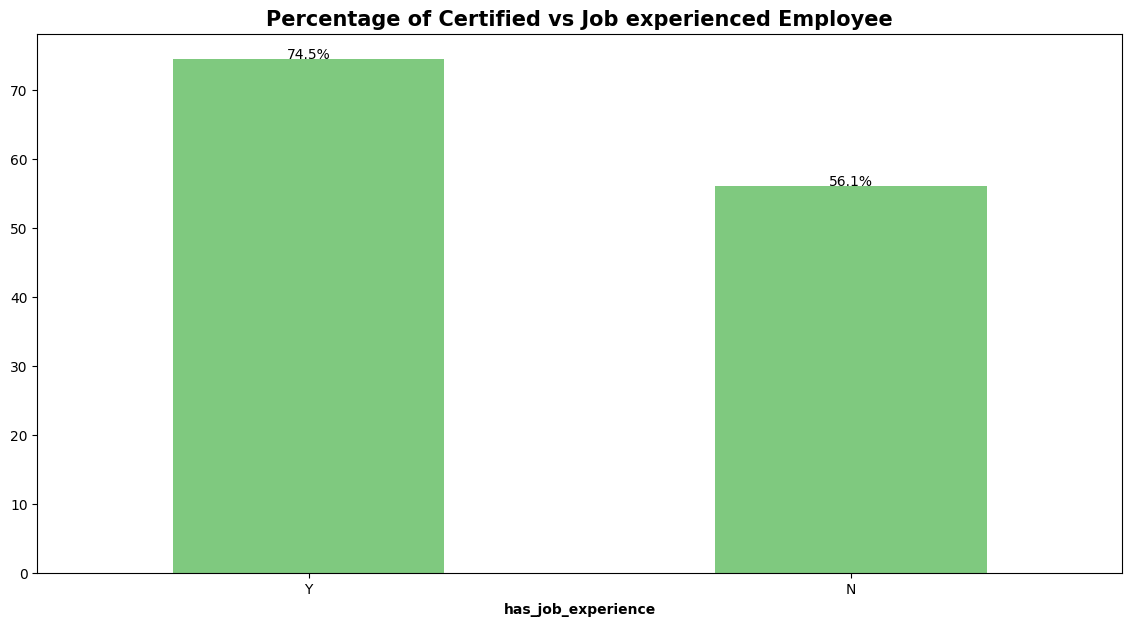

In [32]:
plt.figure(figsize=[14,7])

(100*df2[df2["case_status"].isin(['Certified'])]['has_job_experience'].value_counts()/df2['has_job_experience'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Certified vs Job experienced Employee" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['has_job_experience'].value_counts()/df2['has_job_experience'].value_counts())
print(order1)
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('has_job_experience' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

In [33]:
# People with previous work experience has been certified 74.5% only 25.5% applicant has been denied.
# People with No previous work experience has been certified 56% and denied 43%.
# This means work experience has effect on Visa status.
# There is a slight edge for the people with work experiences then the fresheres as expected. But the difference is not huge.

In [34]:
#If employee requires job training, does it make any impact on visa status?
df.groupby('requires_job_training')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
requires_job_training case_status            
N                     Certified     66.645949
                      Denied        33.354051
Y                     Certified     67.884941
                      Denied        32.115059

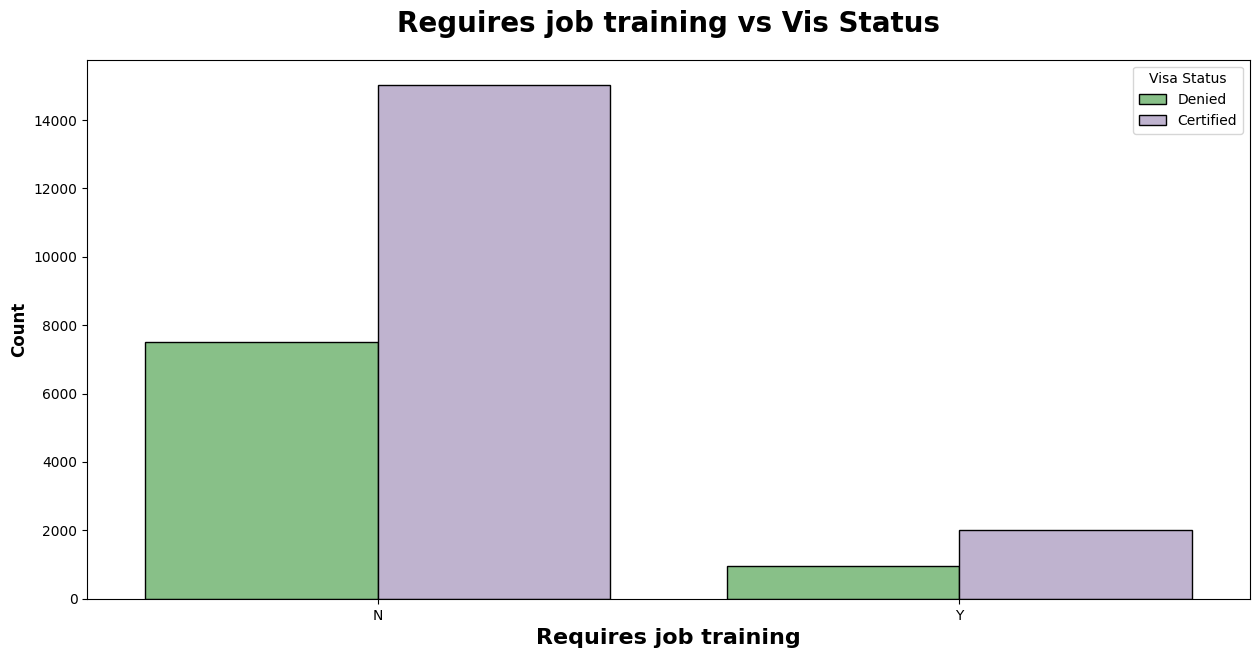

In [35]:
plt.subplots(figsize=(15,7))
sns.countplot(x="requires_job_training",hue='case_status',data=df,ec="black",palette="Accent")
plt.title("Reguires job training vs Vis Status",weight="bold",fontsize=20,pad=20)
plt.ylabel("Count",weight="bold",fontsize=12)
plt.xlabel("Requires job training",weight = "bold",fontsize=16)
plt.legend(title="Visa Status",fancybox=True)
plt.show()


requires_job_training
N    66.645949
Y    67.884941
Name: count, dtype: float64


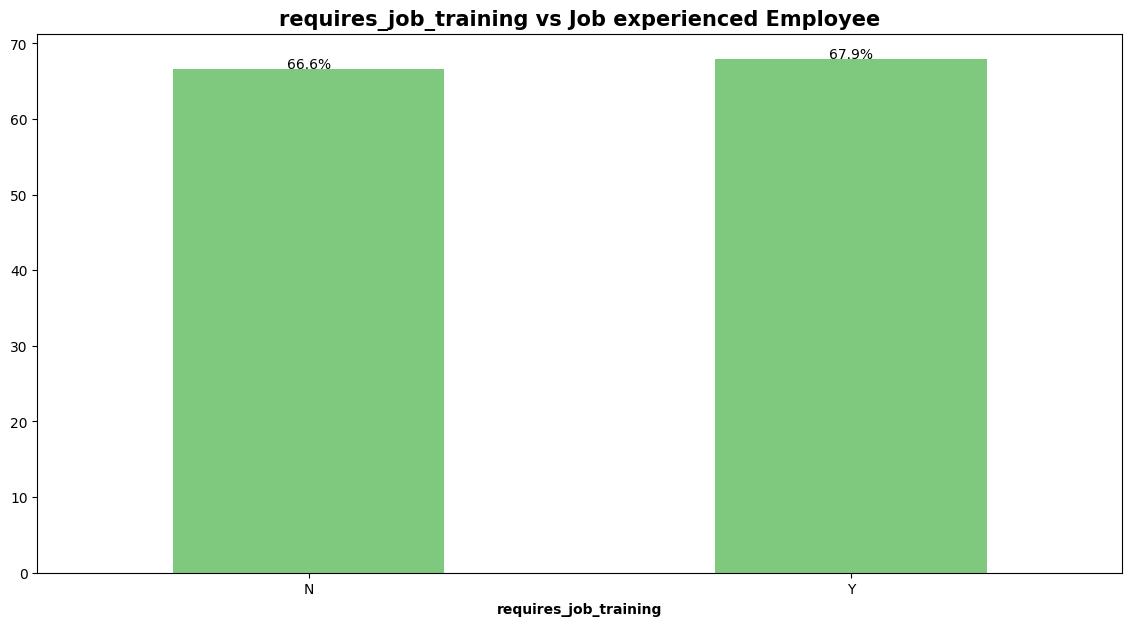

In [36]:
plt.figure(figsize=[14,7])

(100*df2[df2["case_status"].isin(['Certified'])]['requires_job_training'].value_counts()/df2['requires_job_training'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("requires_job_training vs Job experienced Employee" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['requires_job_training'].value_counts()/df2['requires_job_training'].value_counts())
print(order1)
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('requires_job_training' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

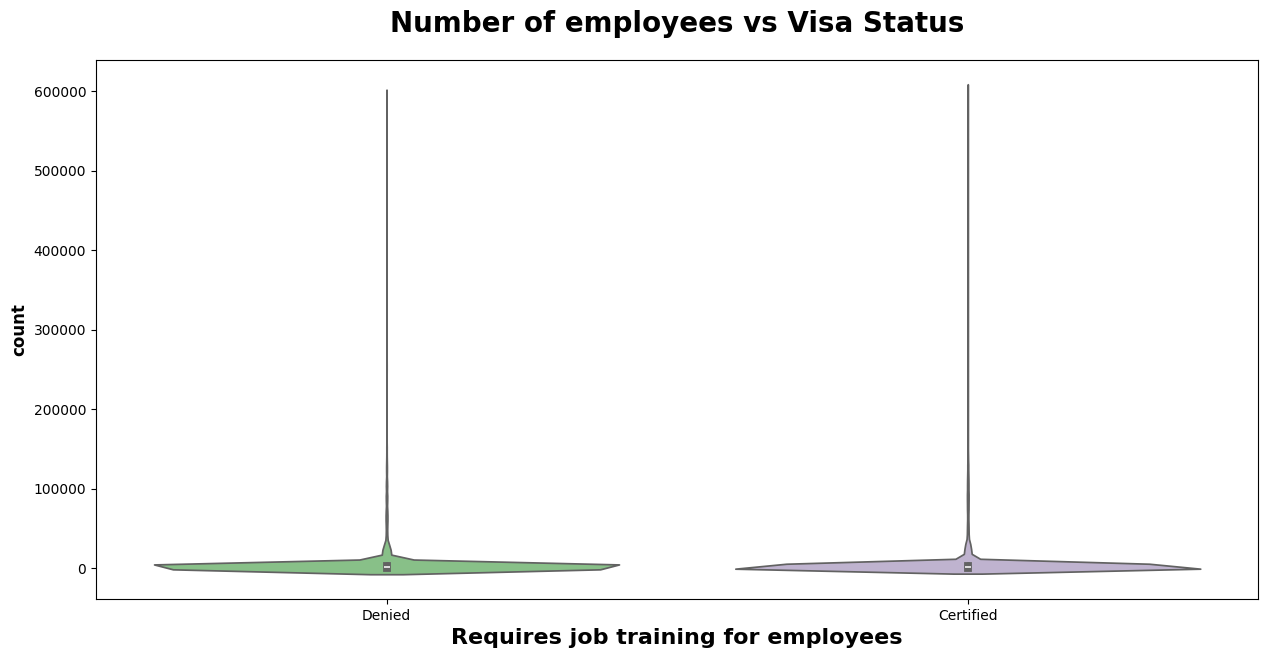

In [41]:
# Does Number of employees of employer has any impact on visa status?
plt.subplots(figsize=(15,7))
sns.violinplot(x="case_status", y="no_of_employees",data=df,palette="Accent")
plt.title("Number of employees vs Visa Status",weight="bold",fontsize=20,pad=20)
plt.ylabel("count",weight="bold",fontsize=12)
plt.xlabel("Requires job training for employees", weight="bold",fontsize=16)
plt.ylim()
plt.show()

In [42]:
# Although the distribution is similar but there are outliers in both the classes which need to be handled

In [45]:
#Wage and its impact on visa status
df.groupby("unit_of_wage")['case_status'].value_counts(normalize=True).to_frame()*100

proportion
unit_of_wage case_status            
Hour         Denied        65.368567
             Certified     34.631433
Month        Certified     61.797753
             Denied        38.202247
Week         Certified     62.132353
             Denied        37.867647
Year         Certified     69.885027
             Denied        30.114973

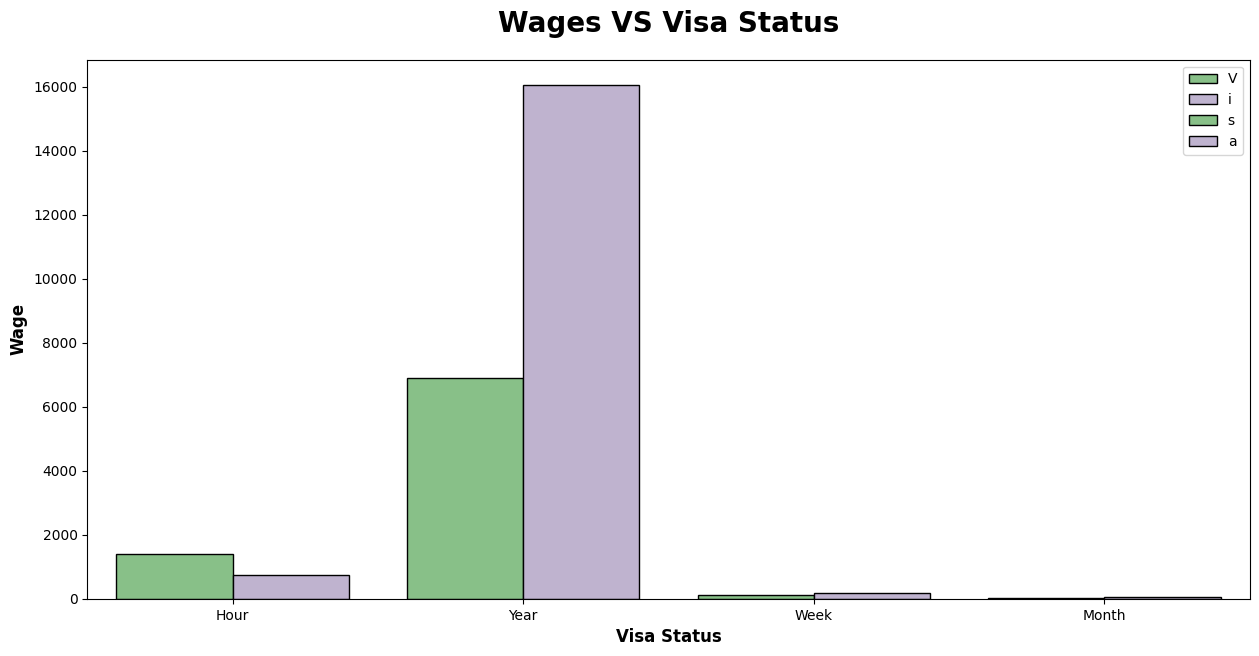

In [46]:
plt.subplots(figsize=(15,7))
sns.countplot(x="unit_of_wage",hue="case_status",data=df,ec='black',palette="Accent")
plt.title("Wages VS Visa Status",weight= "bold",fontsize=20,pad=20)
plt.ylabel("Wage",weight="bold",fontsize=12)
plt.xlabel("Visa Status",weight="bold",fontsize=12)
plt.legend("Visa Status",fancybox= True)
plt.show()

unit_of_wage
Year     69.885027
Hour     34.631433
Week     62.132353
Month    61.797753
Name: count, dtype: float64


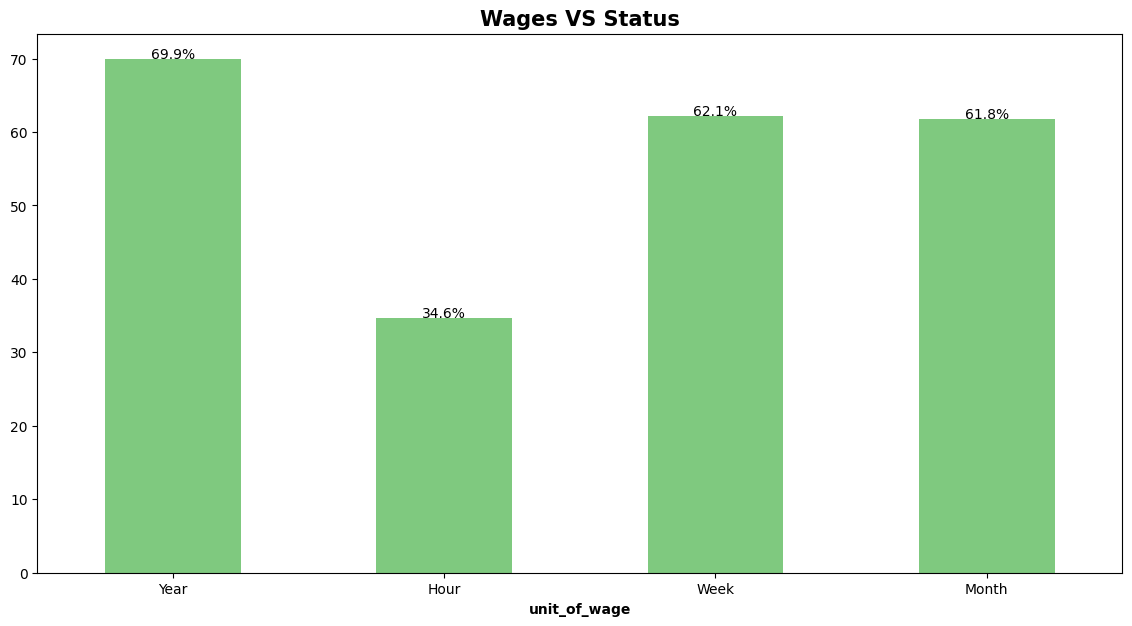

In [47]:
plt.figure(figsize=[14,7])

(100*df2[df2["case_status"].isin(['Certified'])]['unit_of_wage'].value_counts()/df2['unit_of_wage'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Wages VS Status" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['unit_of_wage'].value_counts()/df2['unit_of_wage'].value_counts())
print(order1)
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('unit_of_wage' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

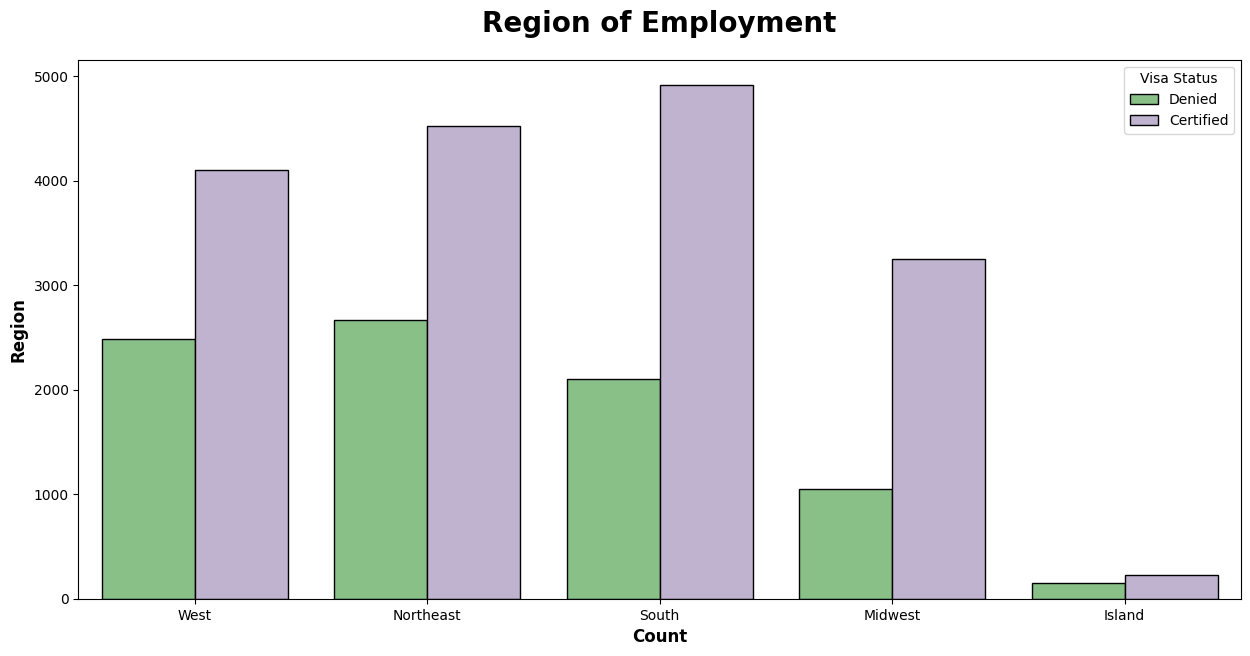

In [49]:
#Does region of Employment has impact on Visa Status
plt.subplots(figsize=(15,7))
sns.countplot(x="region_of_employment",hue="case_status",data=df,ec='k',palette="Accent")
plt.title("Region of Employment",weight="bold",fontsize=20,pad=20)
plt.ylabel("Region",weight="bold",fontsize=12)
plt.xlabel("Count",weight="bold",fontsize=12)
plt.legend(title="Visa Status",fancybox=True)
plt.show()

region_of_employment
Island       60.266667
Midwest      75.528210
Northeast    62.904795
South        70.015676
West         62.253265
Name: count, dtype: float64


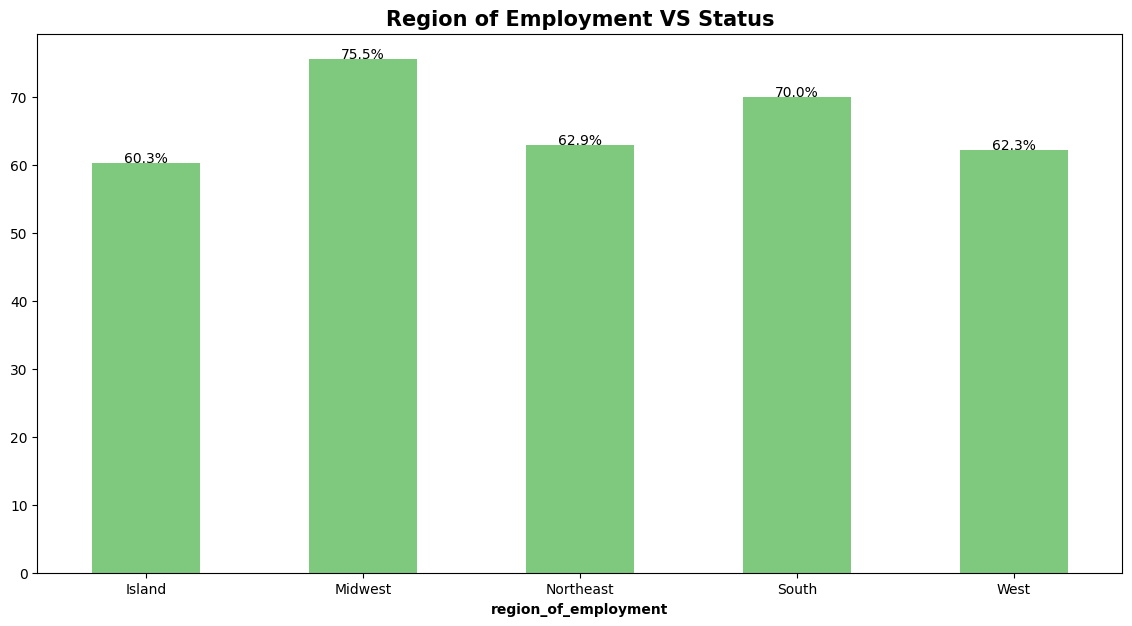

In [51]:
plt.figure(figsize=[14,7])

(100*df2[df2["case_status"].isin(['Certified'])]['region_of_employment'].value_counts()/df2['region_of_employment'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Region of Employment VS Status" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['region_of_employment'].value_counts()/df2['region_of_employment'].value_counts())
print(order1)
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('region_of_employment' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

In [52]:
#Does Prevailing wage has any impact on Visa Status?
# df.groupby("prevailing_wage")['case_status'].value_counts(normalize=True).to_frame()*100
df.groupby("prevailing_wage").case_status.value_counts()

prevailing_wage  case_status
2.1367           Certified      1
2.9561           Denied         1
3.0031           Denied         1
3.3188           Denied         1
3.4889           Certified      1
                               ..
311734.4900      Certified      1
314156.0600      Certified      1
315497.6000      Certified      1
318446.0500      Certified      1
319210.2700      Denied         1
Name: count, Length: 25462, dtype: int64

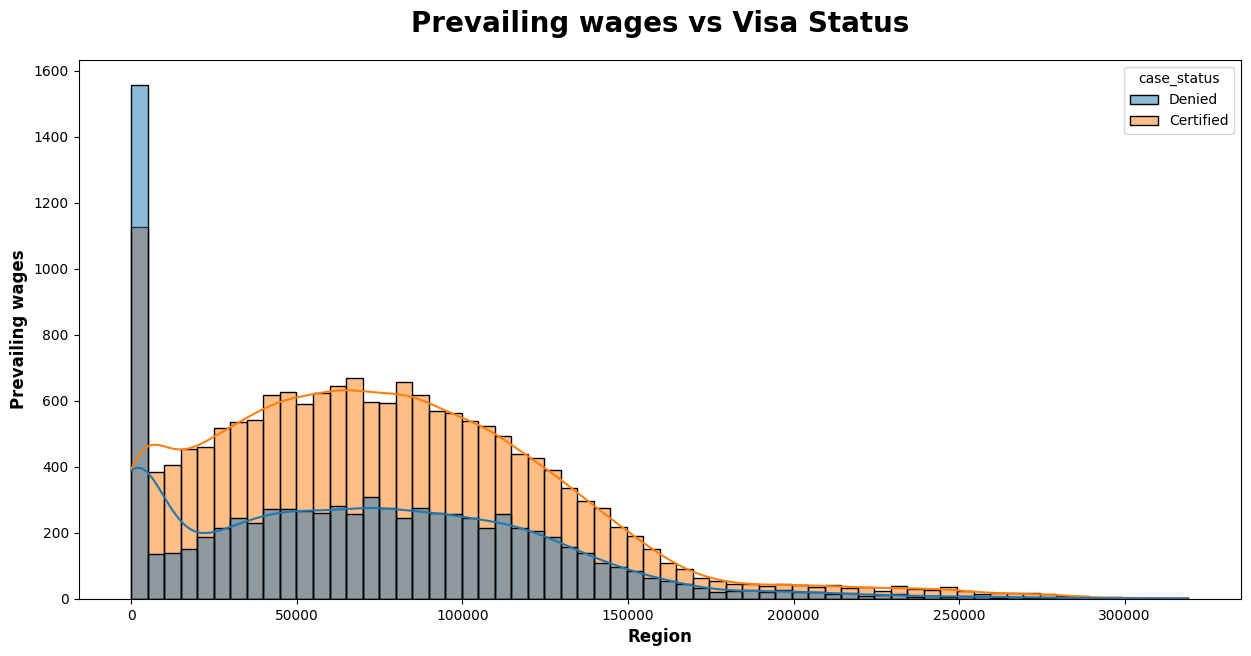

In [55]:
plt.subplots(figsize=(15,7))
sns.histplot(x="prevailing_wage",hue="case_status",data=df,kde=True)
plt.title("Prevailing wages vs Visa Status", weight="bold",fontsize=20,pad=20)
plt.ylabel("Prevailing wages",weight="bold",fontsize=12)
plt.xlabel("Region",weight="bold",fontsize=12)
# plt.legend("")
plt.show()

In [56]:
# Distribution of both classes are same but need to handle the outliers

In [58]:
# Prevailing wage based on Education
print("Average prevailing wage based on education")
df.groupby("education_of_employee")['prevailing_wage'].mean().to_frame().sort_values(by="prevailing_wage",ascending=True)

Average prevailing wage based on education


,prevailing_wage
education_of_employee,
Doctorate,64561.076657
High School,71582.147756
Bachelor's,73405.443735
Master's,78843.057843


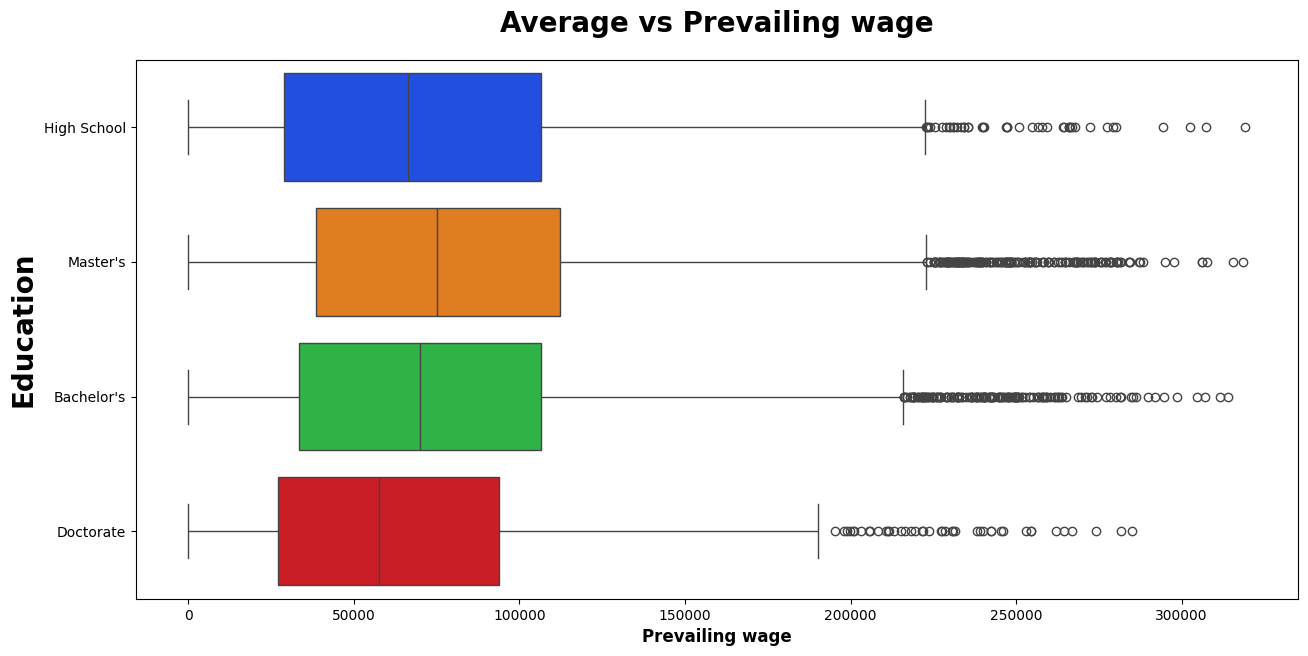

In [60]:
plt.subplots(figsize=(15,7))
sns.boxplot(y="education_of_employee",x="prevailing_wage",data=df,palette='bright')
plt.title("Average vs Prevailing wage",weight="bold",fontsize=20,pad=20)
plt.ylabel("Education",weight="bold",fontsize=20)
plt.xlabel("Prevailing wage",weight="bold",fontsize=12)
# plt.legend()
plt.show()

In [61]:
# We can see Masters education aaplicants have median salary of $78.8K, which is approximately 20% higher than Doctrate's average wage,ehich is strange

In [64]:
# Prevailing wage based on job experience
print("Median Prevailing wage based on job experience")
df.groupby("has_job_experience")['prevailing_wage'].median().to_frame().sort_values(by='prevailing_wage',ascending=True)

Median Prevailing wage based on job experience


,prevailing_wage
has_job_experience,
Y,69033.665
N,72602.290


In [65]:
# Prevailing wage based on Continent
print('Average Prevailing wage based on continent')
df.groupby('continent')['prevailing_wage'].mean().to_frame().sort_values(by='prevailing_wage',ascending=True)

Average Prevailing wage based on continent


,prevailing_wage
continent,
Europe,59842.925899
South America,60209.575314
North America,68066.319257
Oceania,75994.276719
Africa,77425.923450
Asia,79543.021780


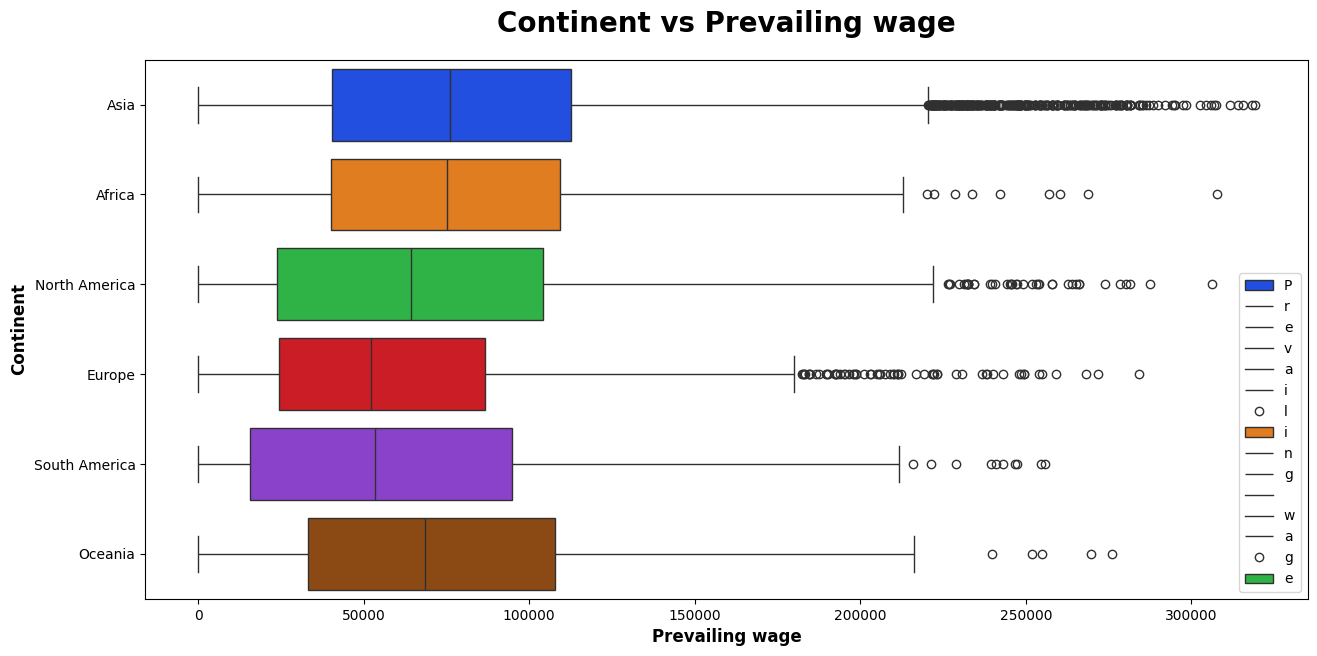

In [68]:
plt.subplots(figsize=(15,7))
sns.boxplot(y="continent",x="prevailing_wage",data=df,palette='bright')
plt.title("Continent vs Prevailing wage",weight='bold',fontsize=20,pad=20)
plt.ylabel("Continent",weight='bold',fontsize=12)
plt.xlabel("Prevailing wage",weight="bold",fontsize=12)
plt.legend("Prevailing wage",fancybox=True)
plt.show()

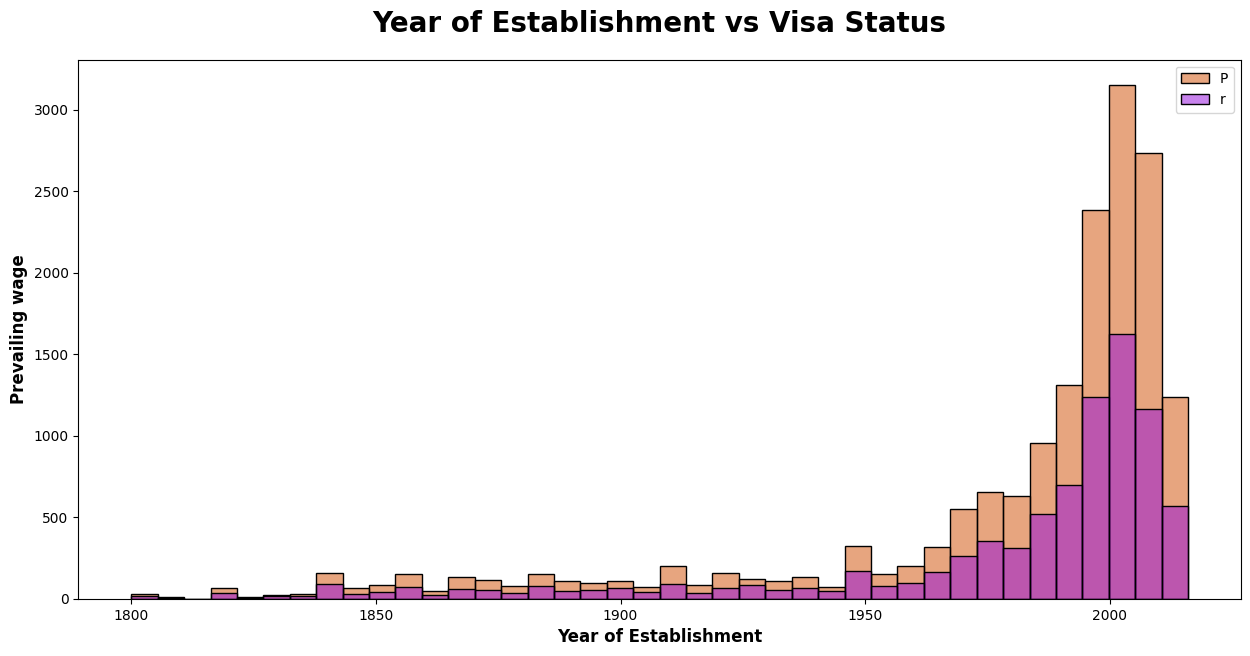

In [70]:
# Year of Establishment

plt.subplots(figsize=(15,7))
sns.histplot(x='yr_of_estab',hue='case_status',data=df,palette='gnuplot',bins=40)
plt.title("Year of Establishment vs Visa Status",weight='bold',fontsize=20,pad=20)
plt.ylabel("Prevailing wage",weight='bold',fontsize=12)
plt.xlabel("Year of Establishment",weight='bold',fontsize=12)
plt.legend("Prevailing wage",fancybox=True)
plt.show()